# アイスクリーム統計学 + Python (第７章〜第９章)

* [アイスクリーム統計学・第１章〜第３章（散布図と相関、相関係数、無相関検定）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E3%82%A2%E3%82%A4%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%A0%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%83%BB%E7%AC%AC%EF%BC%91%E7%AB%A0%E3%80%9C%E7%AC%AC%EF%BC%93%E7%AB%A0.ipynb)
* [アイスクリーム統計学・第４章〜第６章（単回帰、偏相関、重回帰）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E3%82%A2%E3%82%A4%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%A0%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%83%BB%E7%AC%AC%EF%BC%94%E7%AB%A0%E3%80%9C%E7%AC%AC%EF%BC%96%E7%AB%A0.ipynb)
* [アイスクリーム統計学・第７章〜第９章（相関行列、因子分析1、因子分析2）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E3%82%A2%E3%82%A4%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%A0%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%83%BB%E7%AC%AC%EF%BC%97%E7%AB%A0%E3%80%9C%E7%AC%AC%EF%BC%99%E7%AB%A0.ipynb)
* アイスクリーム統計学・第１０章（独自に作成予定）

[アイスクリーム統計学にようこそ！](http://kogolab.chillout.jp/elearn/icecream/index.html)
のページを読み進めながら、以下の課題を Python を使って解いてください。

## 7.　[相関行列](http://kogolab.chillout.jp/elearn/icecream/chap7/sec0.html)
本文を読んで概念を学んでください。

### 7.1　[多変量データ](http://kogolab.chillout.jp/elearn/icecream/chap7/sec1.html)

本文を読んで概念を学んでください。また、 [調査票](https://github.com/maskot1977/ipython_notebook/blob/master/toydata/chosahyo.pdf)を読んで、アンケート内容を把握してください。

### 7.2　[変数をまとめる](http://kogolab.chillout.jp/elearn/icecream/chap7/sec2.html)
ここでは、人を「サンプル」と見なし、バニラ、ストロベリーなどの味の好みを「変数」と見なします。（逆に、バニラ、ストロベリーなどのアイスを「サンプル」と見なし、人の好みを「変数」と見なすこともできます。）

__課題7.2__：[アイスクリームアンケート調査結果](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/icecream_chosa.txt)をダウンロードして、次のコードを実行してください。

In [1]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
#import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [2]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/icecream_chosa.txt'

In [3]:
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'icecream_chosa.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'icecream_chosa.txt') # Python 3 の場合

('icecream_chosa.txt', <http.client.HTTPMessage at 0x104701b00>)

In [4]:
#最初の数レコードだけ確認する
!head icecream_chosa.txt

ID gender age birth_order frequency vanilla strawberry milk_tea macadamia_nuts cookie chocolate melon coffee almond rum_raisin mint banana caramel walnut cassis chocolate_chips orange green_tea marron chocolate_mint adzuki-bean
1 2 20 2 5 7 7 8 3 9 9 6 8 3 2 1 7 9 3 3 9 7 8 8 1 7
2 2 21 2 1 7 8 9 9 9 9 2 7 7 9 5 4 7 8 9 9 4 7 7 8 9
3 2 21 3 2 7 4 3 3 6 4 7 7 6 3 3 4 6 3 3 6 7 3 7 3 3
4 2 21 4 3 9 6 6 5 8 6 8 9 6 5 4 4 9 5 4 8 9 1 2 1 3
5 2 21 4 2 9 5 7 5 6 8 4 4 4 6 9 6 6 6 5 9 6 6 6 9 1
6 2 21 2 5 5 7 5 5 5 7 5 8 5 8 9 5 9 5 8 8 9 9 5 9 1
7 2 21 2 2 9 7 6 3 7 9 4 6 5 2 2 6 7 5 5 9 9 3 5 2 3
8 2 20 2 4 7 7 6 8 7 6 5 8 7 5 6 5 6 7 9 5 6 8 5 6 8
9 2 21 2 4 7 7 4 8 7 7 4 7 6 3 5 5 7 7 6 8 6 3 3 7 3


In [5]:
# バニラ、ストロベリーなどの変数間の関係を見るための「行列」 matrix に格納する。
# Pythonにおける「長さnのリスト（n個の要素が入ったリスト）」は、数学における「n次元の列ベクトル」と同じ意味。
# Pythonにおける「リストのリスト（長さnのリストがm個入ったもの）」は、数学における「m行n列の行列」と同じ意味。
# 変数の名前は val_names というリストに入れる
matrix = []
val_names = []
for i, line in enumerate(open("icecream_chosa.txt")):
    if i == 0:
        for j, val in enumerate(line.split()):
            val_names.append(val)
            matrix.append([])
    else:
        for j, val in enumerate(line.split()):
            matrix[j].append(float(val))

In [6]:
import pandas as pd # データフレームワーク処理のライブラリをインポート

In [7]:
# # できあがったMatrixの中身を確認してください。
pd.DataFrame(matrix, index=val_names)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
ID,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
gender,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
age,20,21,21,21,21,21,21,20,21,22,...,22,24,20,20,21,20,20,23,23,22
birth_order,2,2,3,4,4,2,2,2,2,4,...,4,1,2,2,2,2,3,1,4,2
frequency,5,1,2,3,2,5,2,4,4,4,...,4,2,2,5,6,4,6,5,7,2
vanilla,7,7,7,9,9,5,9,7,7,5,...,7,6,6,8,4,5,7,4,9,8
strawberry,7,8,4,6,5,7,7,7,7,5,...,7,7,6,8,6,6,5,8,7,5
milk_tea,8,9,3,6,7,5,6,6,4,9,...,6,5,5,4,2,4,6,8,7,5
macadamia_nuts,3,9,3,5,5,5,3,8,8,5,...,6,6,8,8,3,9,6,9,5,2
cookie,9,9,6,8,6,5,7,7,7,8,...,8,4,8,9,6,6,8,9,4,5


In [8]:
# バニラ、ストロベリーなどアイスクリームの種類に関するデータは５行目以降なので、Matrixを作り直してください。
matrix = []
val_names = []
sta = 5
for i, line in enumerate(open("icecream_chosa.txt")):
    if i == 0:
        for j, val in enumerate(line.split()):
            if j < sta:
                continue
            val_names.append(val)
            matrix.append([])
    else:
        for j, val in enumerate(line.split()):
            if j < sta:
                continue
            matrix[j - sta].append(float(val))

In [9]:
# できあがったMatrixの中身を確認してください。
pd.DataFrame(matrix, index=val_names)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
vanilla,7,7,7,9,9,5,9,7,7,5,...,7,6,6,8,4,5,7,4,9,8
strawberry,7,8,4,6,5,7,7,7,7,5,...,7,7,6,8,6,6,5,8,7,5
milk_tea,8,9,3,6,7,5,6,6,4,9,...,6,5,5,4,2,4,6,8,7,5
macadamia_nuts,3,9,3,5,5,5,3,8,8,5,...,6,6,8,8,3,9,6,9,5,2
cookie,9,9,6,8,6,5,7,7,7,8,...,8,4,8,9,6,6,8,9,4,5
chocolate,9,9,4,6,8,7,9,6,7,8,...,9,8,7,7,6,7,9,9,6,4
melon,6,2,7,8,4,5,4,5,4,5,...,6,8,3,3,8,4,4,4,7,7
coffee,8,7,7,9,4,8,6,8,7,6,...,5,7,6,6,5,3,4,8,7,1
almond,3,7,6,6,4,5,5,7,6,3,...,5,6,7,6,4,6,4,9,4,5
rum_raisin,2,9,3,5,6,8,2,5,3,3,...,5,8,7,3,2,5,5,1,5,5


### 7.3　[相関行列を計算する(1)](http://kogolab.chillout.jp/elearn/icecream/chap7/sec3.html)
本文を読んで概念を学んでください。

### 7.4　[相関行列を計算する(2)](http://kogolab.chillout.jp/elearn/icecream/chap7/sec4.html)

In [10]:
# 平均値を求める関数
def average(data):
    sum = 0.0
    n = 0.0
    for x in data:
        sum += x
        n += 1.0
    return sum / n

In [11]:
# 分散を求める関数
def dispersion(data):
    ave = average(data)
    accum = 0.0
    n = 0.0
    for x in data:
        accum += (x - ave) ** 2.0
        n += 1.0
    return accum / n

In [12]:
# 標準偏差を求める関数
import math
standard_deviation = lambda data: math.sqrt(dispersion(data))

In [13]:
# 共分散を求める関数
def covariance(data1, data2): 
    ave1 = average(data1)
    ave2 = average(data2)
    accum = 0.0
    n = 0.0
    for d1, d2 in zip(data1, data2):
        accum += (d1 - ave1) * (d2 - ave2)
        n += 1.0
    return accum / n

In [14]:
# 相関係数を求める関数
correlation = lambda data1, data2: covariance(data1, data2) / (standard_deviation(data1) * standard_deviation(data2))

In [15]:
# 相関行列を作る関数
def correlation_matrix(matrix):
    result = []
    for data1 in matrix:
        vector = []
        for data2 in matrix:
            vector.append(correlation(data1, data2))
        result.append(vector)
    return result

In [16]:
# 相関行列を計算し表示する
cormat = correlation_matrix(matrix)
pd.DataFrame(cormat)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000000,0.028515,0.078549,-0.113384,0.054911,-0.110206,-0.112804,0.058322,-0.261641,0.103779,...,0.006796,-0.097745,-0.173749,-0.157352,0.021834,-0.010688,0.015440,0.132379,-0.211786,0.049856
1,0.028515,1.000000,0.207248,0.105375,0.035743,0.208958,0.295756,-0.017244,0.120569,0.060223,...,0.229944,0.142929,0.155927,0.149930,0.155422,0.170910,0.169990,0.124279,-0.013666,0.213412
2,0.078549,0.207248,1.000000,0.341617,0.228646,0.055995,0.069048,0.358647,0.076171,0.128701,...,0.401104,0.414177,0.197385,0.334752,0.106697,0.090938,0.285318,0.285782,-0.019108,0.218824
3,-0.113384,0.105375,0.341617,1.000000,0.343731,0.197442,-0.093036,0.230645,0.438363,0.193574,...,0.079780,0.201508,0.647312,0.302949,0.079059,-0.056018,0.310694,0.291890,0.114404,0.311802
4,0.054911,0.035743,0.228646,0.343731,1.000000,0.259470,-0.016390,0.276814,0.363010,-0.028334,...,0.234514,0.247667,0.281714,0.094633,0.442330,-0.074943,0.016897,0.246303,-0.156397,0.248015
5,-0.110206,0.208958,0.055995,0.197442,0.259470,1.000000,0.210929,0.203535,0.230101,-0.148296,...,0.242511,0.295318,0.209069,0.099631,0.661099,0.123757,0.047984,0.109969,0.191060,0.209861
6,-0.112804,0.295756,0.069048,-0.093036,-0.016390,0.210929,1.000000,0.193373,-0.018380,-0.138505,...,0.241593,0.133873,0.032196,0.058476,0.106230,0.197470,-0.158637,-0.079930,-0.109765,0.030297
7,0.058322,-0.017244,0.358647,0.230645,0.276814,0.203535,0.193373,1.000000,0.259505,0.009779,...,0.288617,0.283974,0.100008,0.312881,0.242711,0.213161,0.237421,0.157815,0.001101,0.057754
8,-0.261641,0.120569,0.076171,0.438363,0.363010,0.230101,-0.018380,0.259505,1.000000,0.141709,...,0.086892,0.308005,0.546367,0.154778,0.277636,0.036828,0.078271,0.074451,0.155004,0.217668
9,0.103779,0.060223,0.128701,0.193574,-0.028334,-0.148296,-0.138505,0.009779,0.141709,1.000000,...,-0.059180,0.047346,0.081568,0.100993,-0.040930,-0.190443,0.219083,0.122659,0.147367,0.012173


### 7.6　[通過テスト](http://kogolab.chillout.jp/elearn/icecream/chap7/sec6.html)

__課題7.6__：[アイスクリームアンケート調査結果](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/icecream_chosa.txt)のデータを用い、以下の問いに答えてください。
* 21種類のアイスクリームの好みのデータについて、すべての組み合わせの相関係数を求めた上で、正の相関が高いもの（ここでは+0.4以上）の組み合わせをリストしてください。
* 同様に、相関行列の中で、負の相関が高いもの（ここでは-0.2以下）の組み合わせをリストしてください。
* 以上の結果を踏まえて、アイスクリームの好みについての分類をしたときに、言えることを書いてください。

## 8.　[因子分析(1)](http://kogolab.chillout.jp/elearn/icecream/chap8/sec0.html)
本文を読んで概念を学んでください。

### 8.1　[因子分析の考え方](http://kogolab.chillout.jp/elearn/icecream/chap8/sec1.html)
本文を読んで概念を学んでください。

### 8.2　[固有値](http://kogolab.chillout.jp/elearn/icecream/chap8/sec2.html)
本文を読んで概念を学んでください。

### 8.3　[因子負荷](http://kogolab.chillout.jp/elearn/icecream/chap8/sec3.html)
本文を読んで概念を学んでください。

### 8.4　[回転](http://kogolab.chillout.jp/elearn/icecream/chap8/sec4.html)
本文を読んで概念を学んでください。

### 8.5　[通過テスト](http://kogolab.chillout.jp/elearn/icecream/chap8/sec6.html)
Pythonでは、因子分析を行うためのライブラリが使えます。

__課題8.5__：因子分析を行う前に、リストの正規化をする（Z値に変換する）関数を作成してください。

In [19]:
# リストの正規化をする（Z値に変換する）関数
def normalize(data):
    ave = average(data)
    std = standard_deviation(data)
    list = []
    for x in data:
        list.append((x - ave) / (std / float(len(data))))
    return list

In [20]:
# リストのリストの正規化をする（Z値に変換する）関数
def normalize2(data):
    list = []
    for x in data:
        list.append(normalize(x))
    return list

__課題8.6__：因子分析を行う以下のコードを実行してください。

In [21]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# 機械学習のライブラリから、因子分析のプログラムをインポート
from sklearn.decomposition import FactorAnalysis

In [42]:
# 因子分析の実行
fa = FactorAnalysis()
factors = fa.fit_transform(normalize2(matrix))

In [43]:
# 左から順に第一因子、第二因子、、、
pd.DataFrame(factors, index=val_names)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
vanilla,1.136457,-0.135903,0.183146,2.456816,-1.421276,-0.885548,0.081451,1.795572,0.294755,-0.953738,...,-1.727644,0.210266,0.176932,-0.525018,0.406828,-0.336982,-0.665964,-0.884494,-0.175464,0
strawberry,1.200434,0.616600,0.392276,-1.814280,-1.855381,1.332283,0.073339,-0.134631,-0.006804,-0.281354,...,1.293454,0.178345,1.022508,-2.171341,0.930782,-0.453417,-0.530607,0.061905,-0.204711,0
milk_tea,0.182718,-0.384159,1.685692,0.253630,0.538697,0.372625,-0.905225,0.251987,0.036453,2.198734,...,0.863544,1.083557,-0.494478,0.656342,-1.430603,-1.054444,-0.042108,-0.841620,-0.029544,0
macadamia_nuts,-1.614898,-0.722836,-0.848287,0.596692,0.175658,0.814382,-0.858059,0.352945,-0.435137,-0.136439,...,0.764405,-2.194145,-1.118107,-1.136178,0.335164,1.525161,0.738079,-1.078513,-0.743199,0
cookie,0.499107,-1.372805,-1.521024,0.345421,-0.917230,0.060011,1.264088,0.075188,0.235913,0.544613,...,1.727515,1.173917,-2.068484,0.976491,0.726101,0.340604,-1.280664,0.042833,0.043121,0
chocolate,0.839824,-0.549766,-1.325449,-0.042087,1.025750,-0.059894,-1.054792,-1.753942,-1.139349,-1.097378,...,-0.474443,-0.497428,0.648656,0.317584,-1.111584,-0.088558,-2.471647,0.464666,0.173468,0
melon,1.658067,2.407727,-0.551212,-0.265686,0.486257,0.569364,-1.313764,-0.559757,0.846010,0.224121,...,-0.659229,-0.760011,-1.521478,1.235698,1.127503,-0.514197,0.617535,-0.518399,-0.678529,0
coffee,-0.084085,0.481812,-0.206850,1.582849,2.522450,1.198419,1.314063,0.102089,1.521656,-0.604792,...,0.849794,0.282199,0.382479,-1.480105,-0.269945,-1.058301,0.074709,0.625517,0.008565,0
almond,-1.194067,0.211349,-1.636336,-0.767849,-0.141027,0.580195,-0.236123,0.091909,0.692682,1.312116,...,-1.486011,1.409837,1.326581,-0.430534,-0.795427,0.513507,-0.334620,-1.890926,-0.624451,0
rum_raisin,-1.160944,0.933308,0.473681,1.672618,-1.451981,-1.510177,-1.293399,-1.552826,0.760351,0.408819,...,1.602300,-0.370767,1.166047,0.178723,-0.081955,0.003484,-0.093470,0.512500,0.151079,0


In [51]:
import numpy as np
fa.score_samples(np.array(normalize2(matrix)))

array([ 633.2874086 ,  623.6738663 ,  627.89890535,  617.7942729 ,
        633.56154253,  629.44151598,  619.36073304,  628.16938093,
        626.44862483,  640.52938531,  622.38451125,  618.36966463,
        626.64734017,  614.02571021,  616.77409657,  627.32886868,
        616.97593428,  633.52858189,  623.36869583,  620.87591737,
        625.25330173])

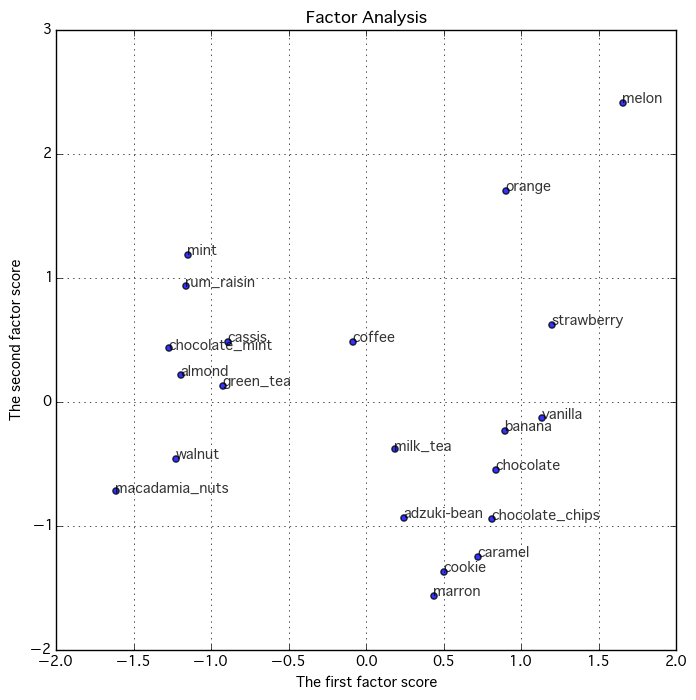

In [25]:
# 第一因子と第二因子でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(factors[:, 0], factors[:, 1], val_names):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(factors[:, 0], factors[:, 1], alpha=0.8)
plt.title("Factor Analysis")
plt.xlabel("The first factor score")
plt.ylabel("The second factor score")
plt.grid(True)
plt.show()

__課題8.7__：上と同様にして、第三因子と第四因子でプロットしてください。また、以上の結果から、アイスクリームの味の好みについて何が言えそうか考察してください。

## 9.　[因子分析(2)](http://kogolab.chillout.jp/elearn/icecream/chap9/sec0.html)
本文を読んで概念を学んでください。

### 9.1　[単純構造](http://kogolab.chillout.jp/elearn/icecream/chap9/sec1.html)
本文を読んで概念を学んでください。

### 9.2　[因子得点](http://kogolab.chillout.jp/elearn/icecream/chap9/sec2.html)
本文を読んで概念を学んでください。

### 9.3　[通過テスト](http://kogolab.chillout.jp/elearn/icecream/chap9/sec3.html)
今までは、アイスクリーム間の関係を解析しましたが、ここからは、人の間の関係を解析します。

__課題9.3__：[アイスクリームアンケート調査結果](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/icecream_chosa.txt)をダウンロードして、先ほどの matrix と縦横を入れ替えた matrixTを作成してください。

In [26]:
# 縦横入れ替えた matrixT を作成
matrixT = []
val_names = []
ids = []
sta = 5
for i, line in enumerate(open("icecream_chosa.txt")):
    if i == 0:
        for j, val in enumerate(line.split()):
            val_names.append(val)
    else:
        vec = []
        for j, val in enumerate(line.split()):
            if j == 0:
                ids.append(val)
            vec.append(float(val))
        matrixT.append(vec)

In [27]:
# できあがったMatrixTの中身の確認
pd.DataFrame(matrixT, columns=val_names)

,ID,gender,age,birth_order,frequency,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,...,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
0,1,2,20,2,5,7,7,8,3,9,...,7,9,3,3,9,7,8,8,1,7
1,2,2,21,2,1,7,8,9,9,9,...,4,7,8,9,9,4,7,7,8,9
2,3,2,21,3,2,7,4,3,3,6,...,4,6,3,3,6,7,3,7,3,3
3,4,2,21,4,3,9,6,6,5,8,...,4,9,5,4,8,9,1,2,1,3
4,5,2,21,4,2,9,5,7,5,6,...,6,6,6,5,9,6,6,6,9,1
5,6,2,21,2,5,5,7,5,5,5,...,5,9,5,8,8,9,9,5,9,1
6,7,2,21,2,2,9,7,6,3,7,...,6,7,5,5,9,9,3,5,2,3
7,8,2,20,2,4,7,7,6,8,7,...,5,6,7,9,5,6,8,5,6,8
8,9,2,21,2,4,7,7,4,8,7,...,5,7,7,6,8,6,3,3,7,3
9,10,2,22,4,4,5,5,9,5,8,...,8,7,2,8,8,6,6,2,1,1


In [28]:
# アイスクリームの種類に関するデータは５行目以降なので、MatrixTを作り直してください。
matrixT = []
val_names = []
ids = []
gender = []
sta = 5
for i, line in enumerate(open("icecream_chosa.txt")):
    if i == 0:
        for j, val in enumerate(line.split()):
            if j < sta:
                continue
            val_names.append(val)
    else:
        vec = []
        for j, val in enumerate(line.split()):
            if j == 0:
                ids.append(val)
            elif j == 1:
                gender.append(int(val))
            elif j < sta:
                continue
            else:
                vec.append(float(val))
        matrixT.append(vec)

In [29]:
# できあがったMatrixTの中身の確認
pd.DataFrame(matrixT, columns=val_names)

,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,melon,coffee,almond,rum_raisin,...,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
0,7,7,8,3,9,9,6,8,3,2,...,7,9,3,3,9,7,8,8,1,7
1,7,8,9,9,9,9,2,7,7,9,...,4,7,8,9,9,4,7,7,8,9
2,7,4,3,3,6,4,7,7,6,3,...,4,6,3,3,6,7,3,7,3,3
3,9,6,6,5,8,6,8,9,6,5,...,4,9,5,4,8,9,1,2,1,3
4,9,5,7,5,6,8,4,4,4,6,...,6,6,6,5,9,6,6,6,9,1
5,5,7,5,5,5,7,5,8,5,8,...,5,9,5,8,8,9,9,5,9,1
6,9,7,6,3,7,9,4,6,5,2,...,6,7,5,5,9,9,3,5,2,3
7,7,7,6,8,7,6,5,8,7,5,...,5,6,7,9,5,6,8,5,6,8
8,7,7,4,8,7,7,4,7,6,3,...,5,7,7,6,8,6,3,3,7,3
9,5,5,9,5,8,8,5,6,3,3,...,8,7,2,8,8,6,6,2,1,1


__課題9.4__：作成した MatrixT をもとに、アイスクリームの好みに関する相関係数を作成してください。また、その相関行列をカラーマップで図示してください。

In [30]:
# 相関行列を計算し表示する
cormatT = correlation_matrix(matrixT)
pd.DataFrame(cormatT)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1.000000,0.011381,0.495591,0.413890,-0.070105,-0.136815,0.690602,-0.109666,0.017512,0.580423,...,0.544725,-0.038752,-0.229693,-8.804017e-02,0.329103,0.027056,0.515384,0.122253,0.127640,-0.042397
1,0.011381,1.000000,-0.429860,-0.179789,0.046072,-0.106825,0.004457,0.389208,0.225875,0.037866,...,0.299920,-0.025166,0.585508,2.277762e-01,-0.344459,0.240827,0.455067,0.175518,-0.478230,-0.177101
2,0.495591,-0.429860,1.000000,0.666794,-0.023783,-0.004480,0.574312,-0.269097,0.181891,0.150580,...,0.353737,-0.106153,-0.374887,-7.355253e-02,0.562616,0.006664,0.133937,-0.173151,0.252252,0.210168
3,0.413890,-0.179789,0.666794,1.000000,0.022780,0.055789,0.693344,-0.108406,0.484647,0.465862,...,0.398989,0.109995,-0.486135,-1.263707e-01,0.699302,0.275118,0.315077,-0.015813,0.296380,0.477380
4,-0.070105,0.046072,-0.023783,0.022780,1.000000,0.517517,0.254505,-0.421860,0.333325,0.193671,...,0.092018,-0.371756,0.265690,4.695911e-01,-0.030744,0.117856,0.293513,0.027389,0.563606,0.111392
5,-0.136815,-0.106825,-0.004480,0.055789,0.517517,1.000000,0.041814,-0.111559,0.231147,0.210932,...,-0.269976,-0.027542,0.142769,3.448676e-01,0.022863,-0.001553,0.105472,0.067078,0.382004,-0.143398
6,0.690602,0.004457,0.574312,0.693344,0.254505,0.041814,1.000000,-0.132954,0.498964,0.608964,...,0.628002,0.010507,-0.255671,2.002099e-01,0.594260,0.381463,0.523324,0.127772,0.347021,0.372045
7,-0.109666,0.389208,-0.269097,-0.108406,-0.421860,-0.111559,-0.132954,1.000000,0.193952,-0.001549,...,-0.239712,0.368370,0.221048,3.509571e-01,-0.185779,0.026056,-0.022049,0.327307,-0.439491,-0.210063
8,0.017512,0.225875,0.181891,0.484647,0.333325,0.231147,0.498964,0.193952,1.000000,0.273518,...,0.351357,-0.188773,0.192168,5.533842e-01,0.410637,0.564432,0.361619,0.439725,0.231358,0.174258
9,0.580423,0.037866,0.150580,0.465862,0.193671,0.210932,0.608964,-0.001549,0.273518,1.000000,...,0.203558,0.122318,-0.270258,5.984268e-02,0.324001,0.277220,0.323540,0.078432,0.274879,0.064651


AttributeError: 'list' object has no attribute 'shape'

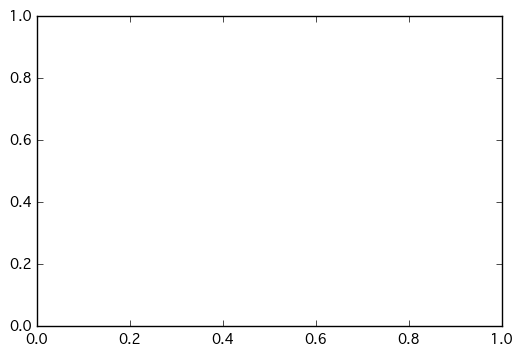

In [31]:
# 得られた相関行列をカラーマップで表示する。
import matplotlib.ticker as ticker
plt.pcolor(cormatT, cmap=plt.cm.Blues)
plt.colorbar()
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlim([0, len(cormatT)])
plt.ylim([0, len(cormatT)])
plt.show()

__課題9.5__：作成した matrixT をもとに、アイスクリームの好みに関する因子分析を実行し、８０人の男女を色分けして、第一因子と第二因子でプロットしてください。また、この結果から、アイスクリームの好みに関して言えることを考察してください。

In [32]:
# 因子分析の実行
fa = FactorAnalysis()
factors = fa.fit_transform(normalize2(matrixT))

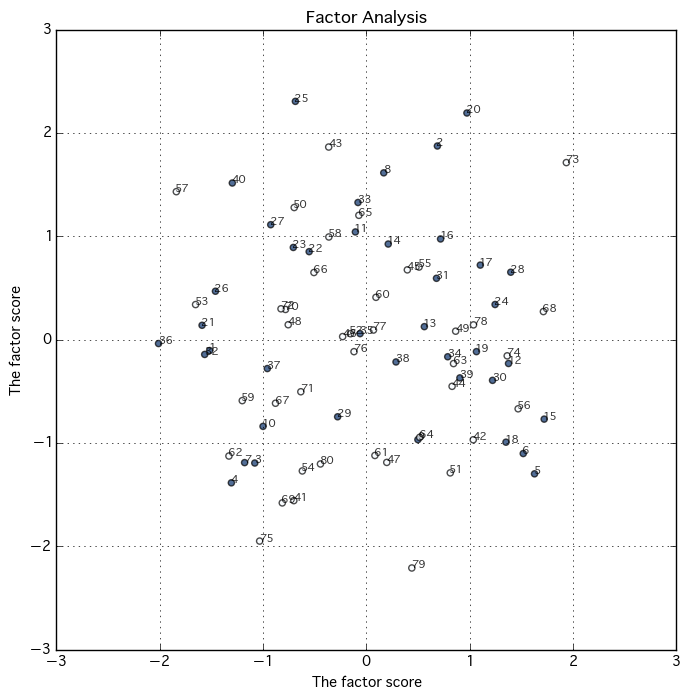

In [33]:
# 第一因子と第二因子でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(factors[:, 0], factors[:, 1], ids):
    plt.text(x, y, name, alpha=0.8, size=8)
plt.scatter(factors[:, 0], factors[:, 1], alpha=0.7, c=gender,  cmap=plt.cm.Blues)
plt.title("Factor Analysis")
plt.xlabel("The factor score")
plt.ylabel("The factor score")
plt.grid(True)
plt.show()

__今日の課題提出__：計算結果を.ipynb ファイル（または.jsonファイル）として保存し、指定したアドレスまでメールしてください。メールタイトルは「__アイスクリーム統計学789__」とし、メール本文に学籍番号と氏名を明記のこと。また、感想も書いてくれると喜びます。今後の講義の改善につながるかも知れません。